# Ánalise  de dados estapciaiss com python

Utilizaremos

- Geopandas
- NetCDF4
- xarray
- rasterio

Aprenderemos a abrir arquivos tipo shapefile,recortar pontos,criar geometrias,abrir rasters e arquivos netCDF

## Introdução ao geopandas

o geopandas funciona como pandas, mas com funcionalidades adicionais que lidam com geometrias
Este pacotes possibilita plotarmos no espaço, abrir.... (Github leo hoinaski)

In [7]:
import geopandas as gpd   #ver tutorial

In [8]:
pathshapefile = r"C:\Users\marcos perrude\Documents\ENS410064\dados\Nova pasta\SC_distritos_CD2022.shp"

geodata = gpd.read_file(pathshapefile)

geodata.head()

,CD_REGIAO,NM_REGIAO,CD_UF,NM_UF,CD_MUN,NM_MUN,CD_DIST,NM_DIST,CD_RGINT,NM_RGINT,CD_RGI,NM_RGI,CD_CONCURB,NM_CONCURB,geometry
0,4,Sul,42,Santa Catarina,4200051,Abdon Batista,420005105,Abdon Batista,4204,Chapecó,420008,Joaçaba - Herval d'Oeste,None,None,"POLYGON ((-51.04368 -27.64094, -51.04398 -27.6..."
1,4,Sul,42,Santa Catarina,4200101,Abelardo Luz,420010105,Abelardo Luz,4204,Chapecó,420011,Xanxerê,None,None,"POLYGON ((-52.12152 -26.68147, -52.12169 -26.6..."
2,4,Sul,42,Santa Catarina,4200200,Agrolândia,420020005,Agrolândia,4207,Blumenau,420022,Rio do Sul,None,None,"POLYGON ((-49.83981 -27.52449, -49.83982 -27.5..."
3,4,Sul,42,Santa Catarina,4200309,Agronômica,420030905,Agronômica,4207,Blumenau,420022,Rio do Sul,None,None,"POLYGON ((-49.68847 -27.31815, -49.68822 -27.3..."
4,4,Sul,42,Santa Catarina,4200408,Água Doce,420040805,Água Doce,4204,Chapecó,420008,Joaçaba - Herval d'Oeste,None,None,"POLYGON ((-51.53125 -27.05144, -51.53139 -27.0..."


<Axes: >

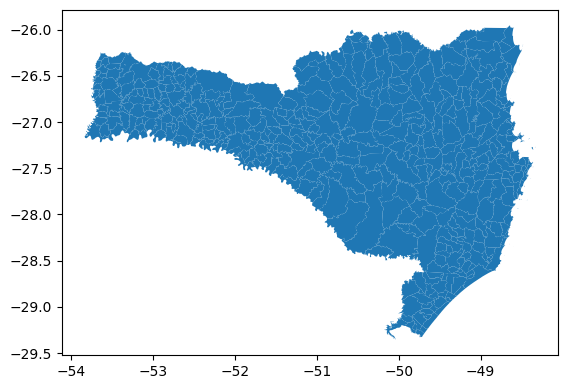

In [9]:
#Plotando - Utilizando matplotlib

geodata.plot()

<Axes: >

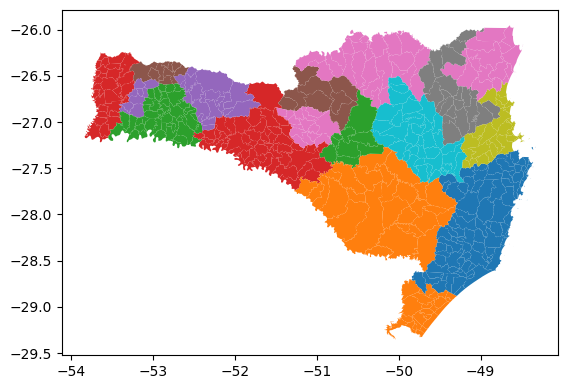

In [10]:
#Plotando - Usar uma coluna do geodata para colorir o mapa

geodata.plot(column = 'CD_RGI')

<Axes: >

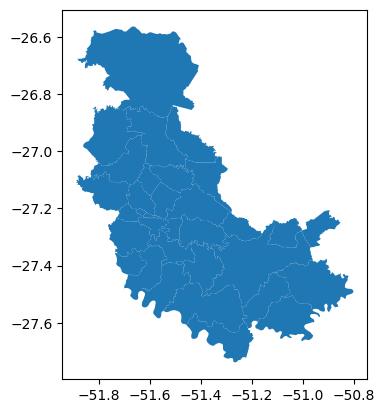

In [11]:
#Selecionando uma regiao de interesse

#Usando um codigo da reguiao como exemplo
cod = '420008'

geodata[geodata['CD_RGI']== cod].plot()

In [12]:
# Enquanto isso... 

# Criando um dataframe com pontos e transformando em geodataframe
import pandas as pd
dataSample = pd.DataFrame({'lon':[-48], 'lat':[-27], 'fire':[10]})

# Conversão para geodataframe
gdf = gpd.GeoDataFrame(
    dataSample, geometry=gpd.points_from_xy(dataSample.lon, dataSample.lat), crs="EPSG:4326"
)

gdf.head()

,lon,lat,fire,geometry
0,-48,-27,10,POINT (-48 -27)


In [13]:
#gdf.explore()  # Abrir no mapa

In [14]:
# Abrindo arquivo do FINN- Queimados e emissoes no mundo no dia 08/07/2024

pathfinn = r"C:\Users\marcos perrude\Documents\ENS410064\dados\FINNv2.5.1_modvrs_nrt_GEOSCHEM_20240708.txt\FINNv2.5.1_modvrs_nrt_GEOSCHEM_20240708.txt"

finn = pd.read_csv(pathfinn)

print('Este é o numero de queimadas nesta data: '+ str(finn.shape[0]))
finn.head()


Este é o numero de queimadas nesta data: 77396


,DAY,POLYID,FIREID,GENVEG,LATI,LONGI,AREA,BMASS,CO2,CO,...,C3H8,CH2O,GLYC,GLYX,HAC,MEK,MGLY,PRPE,TOLU,XYLE
0,190,1,1,2,68.983,143.080,666800.0,2.784,70930000.0,4443000.0,...,16580.0,111900.0,3684.0,0.0,0.0,55710.0,38680.0,75050.0,52950.0,1381.0
1,190,1,2,2,68.998,143.064,538300.0,2.784,57260000.0,3587000.0,...,13380.0,90330.0,2974.0,0.0,0.0,44980.0,31220.0,60590.0,42750.0,1115.0
2,190,1,3,2,68.997,143.082,455400.0,2.784,48440000.0,3034000.0,...,11320.0,76410.0,2516.0,0.0,0.0,38050.0,26410.0,51250.0,36160.0,943.3
3,190,1,4,2,68.999,143.040,424900.0,2.784,45200000.0,2831000.0,...,10560.0,71300.0,2347.0,0.0,0.0,35500.0,24650.0,47820.0,33740.0,880.2
4,190,2,5,2,68.879,140.521,433500.0,2.784,46110000.0,2888000.0,...,10770.0,72730.0,2394.0,0.0,0.0,36220.0,25140.0,48790.0,34420.0,897.9


In [15]:
#Transofrma o dataframe do Finn em geodraframe

# Conversão para geodataframe
gdf = gpd.GeoDataFrame(
    finn, geometry=gpd.points_from_xy(finn.LONGI, finn.LATI), crs="EPSG:4326"
)

gdf.head()

,DAY,POLYID,FIREID,GENVEG,LATI,LONGI,AREA,BMASS,CO2,CO,...,CH2O,GLYC,GLYX,HAC,MEK,MGLY,PRPE,TOLU,XYLE,geometry
0,190,1,1,2,68.983,143.080,666800.0,2.784,70930000.0,4443000.0,...,111900.0,3684.0,0.0,0.0,55710.0,38680.0,75050.0,52950.0,1381.0,POINT (143.08 68.983)
1,190,1,2,2,68.998,143.064,538300.0,2.784,57260000.0,3587000.0,...,90330.0,2974.0,0.0,0.0,44980.0,31220.0,60590.0,42750.0,1115.0,POINT (143.064 68.998)
2,190,1,3,2,68.997,143.082,455400.0,2.784,48440000.0,3034000.0,...,76410.0,2516.0,0.0,0.0,38050.0,26410.0,51250.0,36160.0,943.3,POINT (143.082 68.997)
3,190,1,4,2,68.999,143.040,424900.0,2.784,45200000.0,2831000.0,...,71300.0,2347.0,0.0,0.0,35500.0,24650.0,47820.0,33740.0,880.2,POINT (143.04 68.999)
4,190,2,5,2,68.879,140.521,433500.0,2.784,46110000.0,2888000.0,...,72730.0,2394.0,0.0,0.0,36220.0,25140.0,48790.0,34420.0,897.9,POINT (140.521 68.879)


In [16]:
#gdf.explore()

<Axes: >

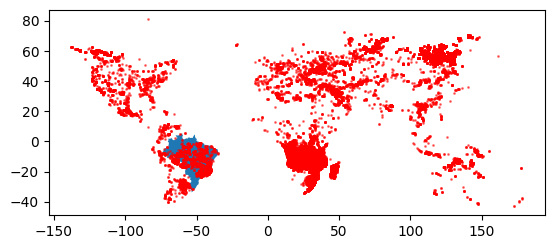

In [17]:
# Verificando focos de calor no mundo e no brasil

# Abrindo shape do brasil
shapebr = gpd.read_file(r"C:\Users\marcos perrude\Documents\ENS410064\dados\BR_Pais_2022 (1)\BR_Pais_2022.shp")

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
shapebr.plot(ax=ax)
gdf.plot(ax=ax,color='red',alpha=0.5,markersize=1)  #Ao colocar ax=ax, plota no mesmo grafico que o shapebr

In [18]:
finnbr = gdf.clip(shapebr.to_crs('EPSG:4326'))

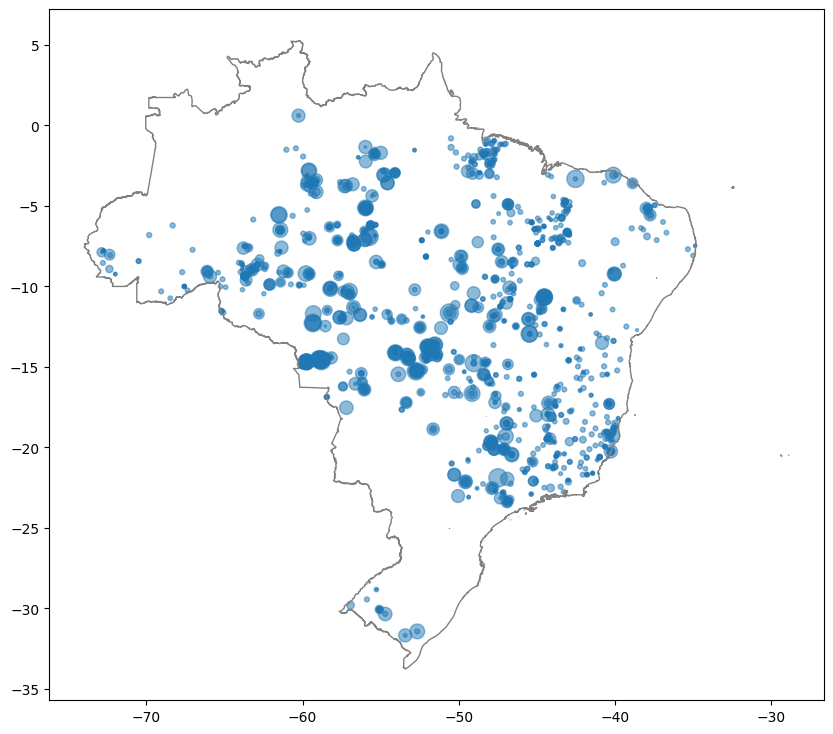

In [19]:

fig, ax= plt.subplots(figsize = (10,10))
shapebr.boundary.plot(ax=ax, color= 'gray', linewidth=1)
ax.scatter(finnbr.LONGI, finnbr.LATI, alpha = 0.5 , s= finnbr.AREA/10000)

In [20]:
# Cortando pontos por estado

shapeuf= gpd.read_file(r"C:\Users\marcos perrude\Documents\ENS410064\dados\BR_UF_2022 (1)\BR_UF_2022.shp")
shapeuf = shapeuf.to_crs('EPSG:4326')
fireinuf = []

for uf in range (0, shapeuf.shape[0]):
    print(shapeuf.iloc[uf,:])
    finnuf = finnbr.clip(shapeuf.geometry[uf])
    fireinuf.append(finnuf)

CD_UF                                                       12
NM_UF                                                     Acre
SIGLA_UF                                                    AC
NM_REGIAO                                                Norte
AREA_KM2                                            164173.429
geometry     POLYGON ((-68.792817347 -10.999569268, -68.793...
Name: 0, dtype: object
CD_UF                                                       13
NM_UF                                                 Amazonas
SIGLA_UF                                                    AM
NM_REGIAO                                                Norte
AREA_KM2                                           1559255.881
geometry     POLYGON ((-56.7629192859999 -3.23220976999994,...
Name: 1, dtype: object
CD_UF                                                       15
NM_UF                                                     Pará
SIGLA_UF                                                    PA
NM_REGIAO

In [21]:
# Quantificado focos por estado


dfuf = pd.DataFrame()
dfuf['UF'] = shapeuf.NM_UF
dfuf['fireCount'] = 0
for ii,fire in enumerate(fireinuf):
    print(shapeuf.NM_UF[ii] + ' ' + str(fire.shape[0]))
    dfuf.iloc[ii,1] = fire.shape[0]
dfuf.head()

Acre 23
Amazonas 85
Pará 209
Amapá 0
Tocantins 74
Maranhão 106
Piauí 29
Ceará 13
Rio Grande do Norte 9
Paraíba 4
Pernambuco 3
Alagoas 0
Sergipe 0
Bahia 94
Minas Gerais 187
Espírito Santo 70
Rio de Janeiro 19
São Paulo 54
Paraná 1
Santa Catarina 0
Rio Grande do Sul 17
Mato Grosso do Sul 0
Mato Grosso 304
Goiás 58
Distrito Federal 4
Rondônia 57
Roraima 2


,UF,fireCount
0,Acre,23
1,Amazonas,85
2,Pará,209
3,Amapá,0
4,Tocantins,74


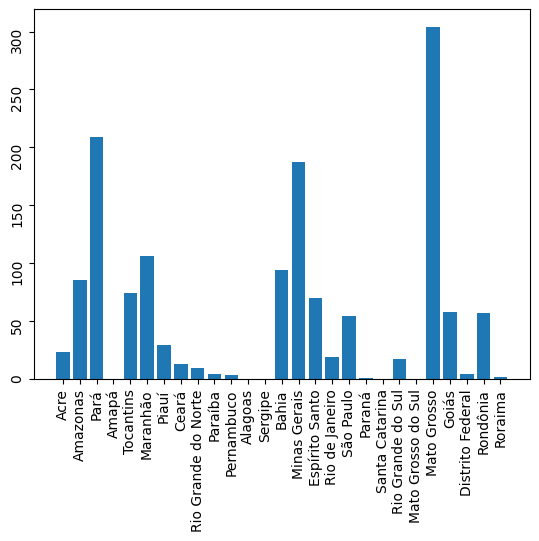

In [22]:
fig, ax = plt.subplots()
ax.bar(dfuf.UF, dfuf.fireCount)
ax.tick_params(rotation = 90)

# Dados tipo raster

Trabalharemos com dados tipo rasterio -  tutporial - github leo


In [23]:
import rasterio

In [24]:
#Abrindo arquivo do SRTM usnaod rasterio
dataset = rasterio.open(r"C:\Users\marcos perrude\Documents\ENS410064\dados\EZ_AERMOD_Marcos_2024-11-14\mergedSRTM.tif")

In [25]:
#Determinando tamanho do dataset
print(dataset.width)
print(dataset.height)

3614
3371


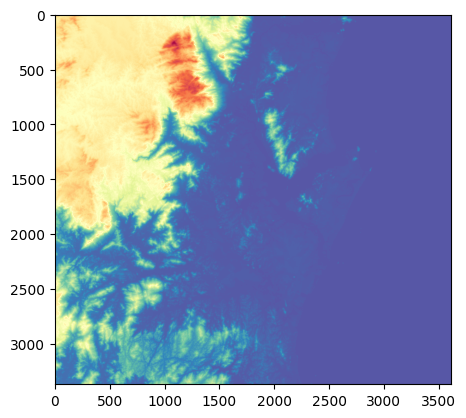

In [26]:
fig, ax = plt.subplots()
ax.imshow(dataset.read(1), cmap = 'Spectral_r')

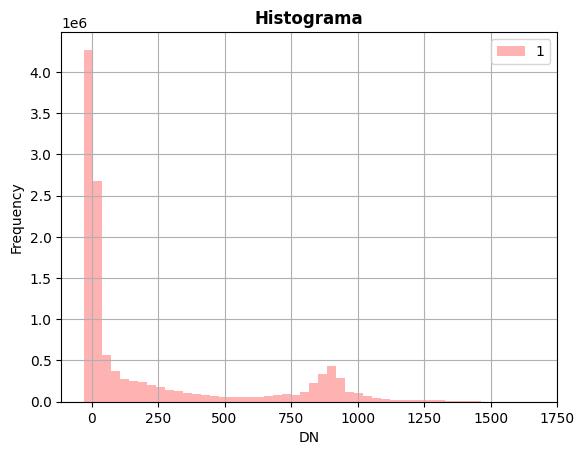

In [27]:
#Outro plot

from rasterio.plot import show_hist
show_hist(
    dataset, bins =50, lw=0.0, stacked = False, alpha=0.3,
    histtype = 'stepfilled', title='Histograma')

In [28]:
#Transofrmando para um array numpy

import numpy as np
arr= np.array(dataset.read(1))   #TRsnformando em uma matriz, para obter os valotres da topografia
arr.shape

(3371, 3614)

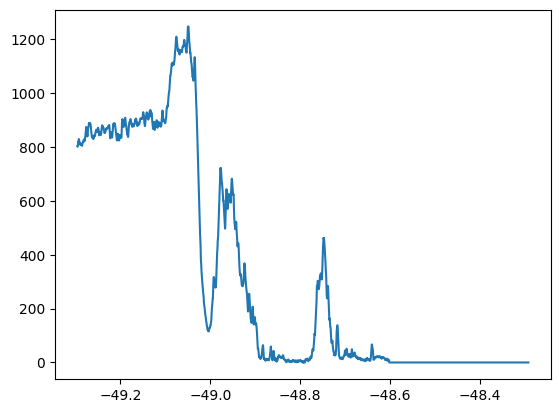

In [29]:
# Acessando matriz arr
height = dataset.shape[0]
width = dataset.shape[1]
cols, rows = np.meshgrid(np.arange(width), np.arange(height))
xs, ys = rasterio.transform.xy(dataset.transform, rows, cols)
lons= np.array(xs)
lats = np.array(ys)

xlon = xs.reshape(arr.shape)
xlon.shape
plt.plot(xlon[1000,:], arr[1000,:])